<a href="https://colab.research.google.com/github/eccardoso/ML/blob/main/ML_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning - Prof. Tatiana Escovedo
## Aula 02: Problemas de Regressão

### Prática 2

In [77]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM
from sklearn.metrics import accuracy_score

In [67]:
# Carga do dataset

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/eccardoso/ML/main/BASE_ML_v2.csv"

# Lê o arquivo
datasetori = pd.read_csv(url, delimiter=';')

# Converte as variaveis para float
datasetori["Media_Mae"]=pd.to_numeric(datasetori["Media_Mae"],errors='coerce')
datasetori["Media_Prod"]=pd.to_numeric(datasetori["Media_Mae"],errors='coerce')

# Eliminando colunas não relevantes para análise e mostrando as primeiras linhas
dataset=datasetori.drop(['Brinco_Pai','Brinco_Mae','Brinco_Animal','Classe'],axis='columns')
dataset.head()
dataset.describe()

,Media_Pai,Media_Mae,Idade,Ordem_Lac,DEL,Media_Prod
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,1.601511,1.458417,3.597122,1.683453,252.805755,1.458417
std,0.118877,0.568237,1.220118,0.816816,138.165458,0.568237
min,1.310000,0.600000,2.000000,1.000000,17.000000,0.600000
25%,1.460000,1.090000,3.000000,1.000000,175.500000,1.090000
50%,1.660000,1.320000,3.000000,1.000000,255.000000,1.320000
75%,1.660000,1.870000,4.000000,2.000000,296.000000,1.870000
max,1.760000,2.900000,7.000000,4.000000,913.000000,2.900000


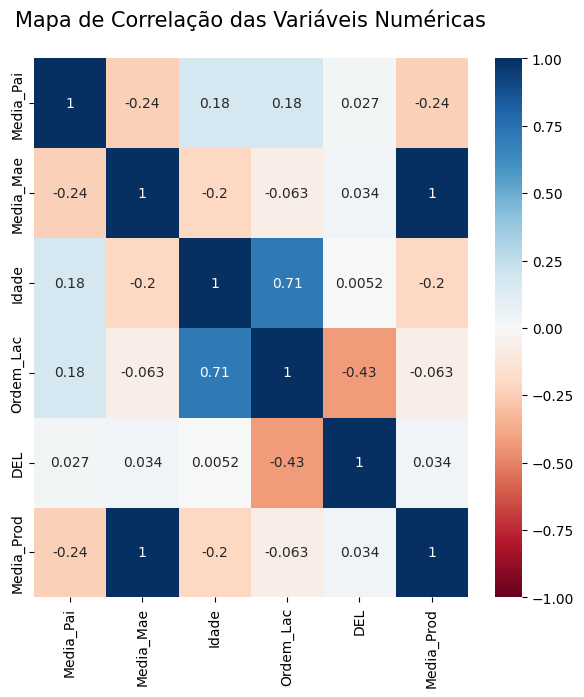

In [78]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

In [4]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:5] # atributos
y = array[:,5] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

LR: MSE 0.00 (0.00) - RMSE 0.00
Ridge: MSE 0.00 (0.00) - RMSE 0.02
Lasso: MSE 0.35 (0.09) - RMSE 0.59
KNN: MSE 0.42 (0.16) - RMSE 0.65
CART: MSE 0.00 (0.00) - RMSE 0.02
SVM: MSE 0.38 (0.14) - RMSE 0.62


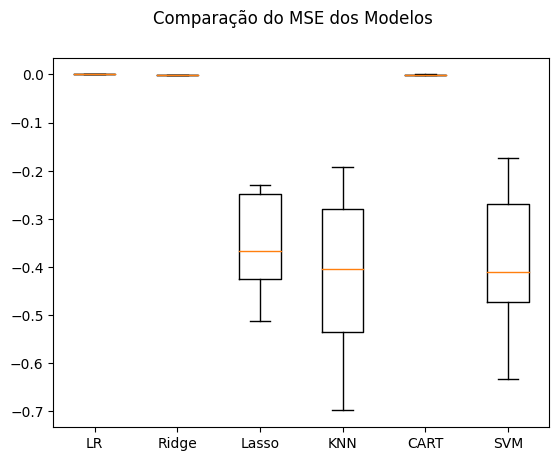

In [5]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [75]:
# Criando um modelo com todo o conjunto de treino
#model = KNeighborsRegressor(n_neighbors=19)
model = LinearRegression()
model.fit(X_train, y_train)
# extrair coeficientes
slope = model.coef_
intercept = model.intercept_
r_squared = model.score(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))
print(r_squared)
print("b0: \t{}".format(intercept))
print("b1: \t{}".format(slope[0]))
#print (predictions[:20])

MSE 0.00
RMSE 0.00
1.0
b0: 	-5.773159728050814e-15
b1: 	-1.0755232997221747e-14


In [79]:
# Novos dados - não sabemos a classe!
data = {'Media_Pai': [1.58,1.66,1.66],
        'Media_Mae': [1.09,1.37,1.87],
        'Idade':[2,6,4],
        'Ordem_Lac': [1,2,2],
        'DEL':[276,350,346]
        }

atributos = ['Media_Pai','Media_Mae','Idade','Ordem_Lac','DEL']
entrada = pd.DataFrame(data, columns=atributos)
print(entrada)

array_entrada = entrada.values
X_entrada=array_entrada

print(entrada.info())

# Padronização nos dados de entrada usando o scaler utilizado em X
#rescaledEntradaX = scaler.transform(X_entrada)
#print(X_entrada)

   Media_Pai  Media_Mae  Idade  Ordem_Lac  DEL
0       1.58       1.09      2          1  276
1       1.66       1.37      6          2  350
2       1.66       1.87      4          2  346
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Media_Pai  3 non-null      float64
 1   Media_Mae  3 non-null      float64
 2   Idade      3 non-null      int64  
 3   Ordem_Lac  3 non-null      int64  
 4   DEL        3 non-null      int64  
dtypes: float64(2), int64(3)
memory usage: 248.0 bytes
None


In [80]:
# Predição de classes dos dados de entrada
# Deveria ser classe 3 e 2
saidas = model.predict(X_entrada)
print(saidas)

[1.09 1.37 1.87]
